# A raw analysis for 2016 US president campaign at AK, AR, AL, AZ

Analyze total data:
==

Ranking of the total donation amount each candidate get
==

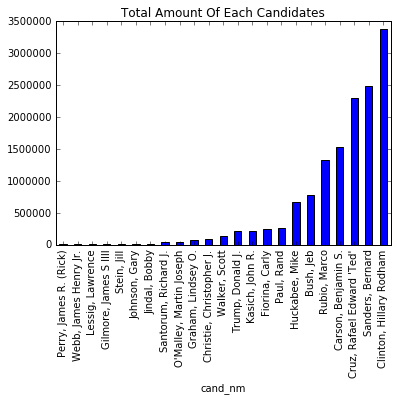

In [89]:
import sys, os
import time
import glob
import pandas as pd
import matplotlib.pyplot as plt
 
%matplotlib inline

## Read in all csv file in the folder and create a huge dataframe
folder_path = r'**Path where your csv files locate**'

all_files = glob.glob(folder_path + "/*.csv")
domations = pd.DataFrame()
list_ = []
for f in all_files:
    df = pd.read_csv(f, delimiter=',', encoding="utf_8_sig")
    list_.append(df)
donations = pd.concat(list_, ignore_index=True)

##Show plot of total received donation for each candidates
total_donations = donations.groupby("cand_nm").sum().sort_values("contb_receipt_amt")
total_donations["contb_receipt_amt"].plot(kind="bar", title="Total Amount Of Each Candidates")
plt.show()

Ranking of the average donation amount for one time for each candindates
==

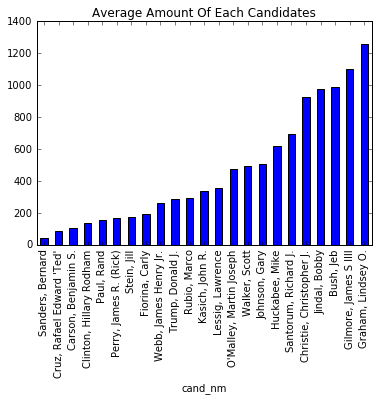

In [5]:
avg_donations = donations.groupby("cand_nm").mean().sort_values("contb_receipt_amt")
avg_donations["contb_receipt_amt"].plot(kind="bar", title="Average Amount Of Each Candidates")

Ranking of the possibility to donate to a candidate
==

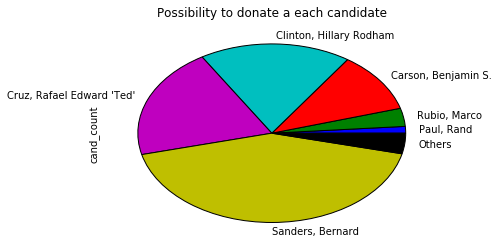

In [61]:
pos_donations = donations.copy()
pos_donations["cand_count"] = 1
total_amount = len(pos_donations["cand_count"])
result_pos_donations = pos_donations.groupby("cand_nm").sum().sort_values("cand_count")
result_pos_donations["cand_count"] = (result_pos_donations["cand_count"] / total_amount)
result_pos_donations = result_pos_donations[result_pos_donations["cand_count"] > 0.01]
new_entry = {"cand_nm":["Others"], "contbr_zip":[""], "contb_receipt_amt":[""], "file_num":[""], "cand_count":[1-result_pos_donations["cand_count"].sum()]}
others_df = pd.DataFrame(new_entry)
others_df.index = others_df["cand_nm"]
del others_df["cand_nm"]
result_pos_donations = result_pos_donations.append(others_df)
result_pos_donations["cand_count"].plot(kind="pie", title="Possibility to donate a each candidate")

Ranking of total donation amount for 4 referred state
==

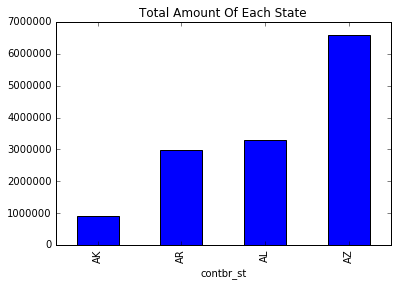

In [3]:
## Show plot of each state's donation
st_donations = donations.groupby("contbr_st").sum().sort_values("contb_receipt_amt")
st_donations["contb_receipt_amt"].plot(kind="bar", title="Total Amount Of Each State")
plt.show()

Ranking of donation amount for each month
==

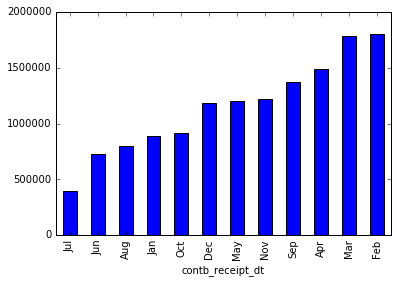

In [3]:
## Show total donation of different month
mon_donations = donations.copy()
for i in range(len(mon_donations.loc[:,"contb_receipt_dt"])):
    mon_donations.loc[i, "contb_receipt_dt"] = mon_donations.loc[i, "contb_receipt_dt"][mon_donations.loc[i, "contb_receipt_dt"].find("-") + 1:mon_donations.loc[i, "contb_receipt_dt"].rfind("-")]
result_mon_donations = mon_donations.groupby("contb_receipt_dt").sum().sort_values("contb_receipt_amt")
result_mon_donations["contb_receipt_amt"].plot(kind="bar")

Using RandomForest to predict donation and output the mean square error
==

In [92]:
pdonations = donations[["contbr_st", "contbr_occupation", "cand_nm","contb_receipt_amt"]]
for column in ["contbr_st", "contbr_occupation", "cand_nm"]:
    pdonations.loc[:,column] = pdonations.loc[:,column].astype('category').cat.codes

#print(pdonations["contb_receipt_amt"])
    
from sklearn.cross_validation import train_test_split
train, test, y_train, y_test = train_test_split(pdonations[["contbr_st", "contbr_occupation", "cand_nm"]], pdonations["contb_receipt_amt"], test_size=0.33, random_state=1)

from sklearn.ensemble import RandomForestRegressor
model = RandomForestRegressor(n_estimators=100, min_samples_leaf=10)
model.fit(train, y_train)

#print(train)
#print(y_train)

predictions =  model.predict(test)

from sklearn.metrics import mean_squared_error
import math
print("Mean square error between actual donation and predict donation is", str(mean_squared_error(predictions, y_test)))

D:\Anaconda_Install\lib\site-packages\pandas\core\indexing.py:465: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self.obj[item] = s


Mean square error between actual donation and predict donation is 112059.622979


Analyze state data:
==

The candidate that most possible to get a donation in each state
==

In [80]:
candidate_state_donations = donations.copy()
candidate_state_donations["cand_count"] = 1
#print(len(candidate_state_donations["cand_nm"].unique()))
for i in range(len(candidate_state_donations["contbr_st"].unique())):
    state_donation = candidate_state_donations.copy().loc[candidate_state_donations["contbr_st"] == candidate_state_donations["contbr_st"].unique()[i]]
    group_state_donation = state_donation.groupby("cand_nm").sum().sort_values("cand_count", ascending=False)
    cand_result = group_state_donation[group_state_donation["cand_count"] == group_state_donation["cand_count"][0]].index.tolist()[0]
    print("The candidate that most possible to get a donation in", candidate_state_donations["contbr_st"].unique()[i], "is", cand_result)
    

The candidate that most possible to get a donation in AK is Sanders, Bernard
The candidate that most possible to get a donation in AL is Cruz, Rafael Edward 'Ted'
The candidate that most possible to get a donation in AR is Sanders, Bernard
The candidate that most possible to get a donation in AZ is Sanders, Bernard


Ranking of the possibility of each candidate to get a donation in each state
==

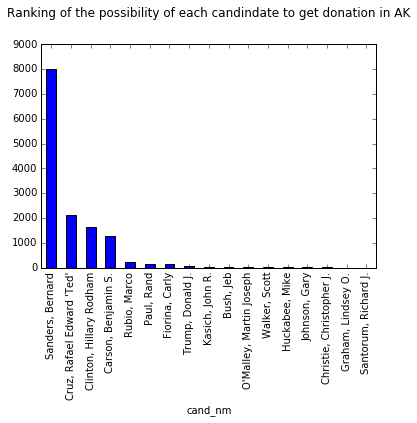

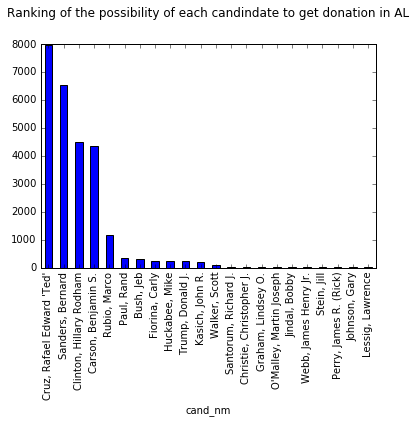

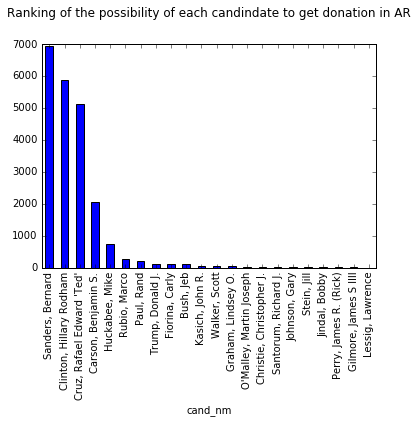

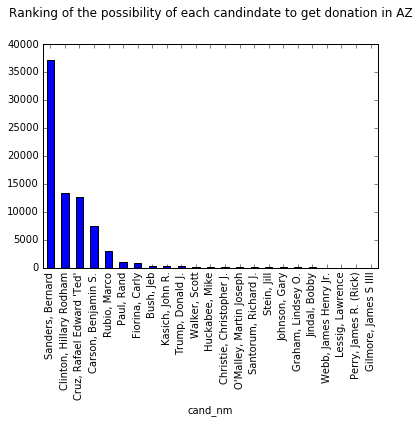

In [88]:
candidate_state_donations = donations.copy()
candidate_state_donations["cand_count"] = 1
for i in range(len(candidate_state_donations["contbr_st"].unique())):
    state_donation = candidate_state_donations.copy().loc[candidate_state_donations["contbr_st"] == candidate_state_donations["contbr_st"].unique()[i]]
    group_state_donation = state_donation.groupby("cand_nm").sum().sort_values("cand_count", ascending=False)
    group_state_donation["cand_count"].plot(kind="bar")
    plt.title("Ranking of the possibility of each candindate to get donation in "+candidate_state_donations["contbr_st"].unique()[i], y=1.10)
    plt.show()

Analyze candidate data:
==

Clinton, Hillary Rodham
==

Show ranking of total donation amount for each state
==

Gap between most donated state and least donated state is: 1295797.56


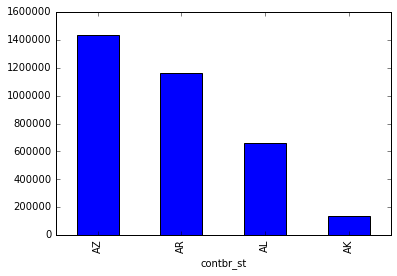

In [11]:
hillary_st_donations = donations.copy().loc[donations["cand_nm"] == "Clinton, Hillary Rodham"]
result_st_donations = hillary_st_donations.groupby("contbr_st").sum().sort_values("contb_receipt_amt", ascending=False)
result_st_donations["contb_receipt_amt"].plot(kind="bar")
print("Gap between most donated state and least donated state is:", result_st_donations["contb_receipt_amt"][0] - result_st_donations["contb_receipt_amt"][-1])